# <center> What is `Encoding`?
Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.

The different kinds of Encoding are:
- One-hot Encoding.
- N-1 dummy Encoding.
- Label Encoding.
- Ordinal Encoding.
- Count/Frequency Encoding.
- Target Encoding.
- Leave-one-out Encoding.
- Catboost Encoding.

## 1) One-Hot Encoding:
It is the most widely used categorical encoding technique. It is suitable for nominal categorical variables, where the categories hava no inherent order or relationships. 
The idea behind one-hot encoding is to represent each category as a binary vector.

Here's how it works:
- For each category in a categorical column, a new binary column is created
- The binary column will have a value of 1 if the class is present, else it will be zero

<b>Pros: </b> It preserves all information about the categories and doesn't introduce any ordinal relationship.

<b>Cons:</b> It can lead to a high dimensionality problem when dealing with a large number of classes.

<b>When to use:</b> Ideally for categorical features with less than 10 categories(max 50 categories can be considered)

In [27]:
import pandas as pd
data = {'color': ['blue', 'green', 'yellow', 'red', 'white'],}
df = pd.DataFrame(data)
df

,color
0,blue
1,green
2,yellow
3,red
4,white


In [28]:
one_hot_encoded = pd.get_dummies(df['color'],dtype=int)
one_hot_encoded

,blue,green,red,white,yellow
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

df_encoded = pd.DataFrame(encoder.fit_transform(df[['color']]).toarray(), columns= ['encode_blue', 'encode_green', 'encode_red', 'encode_white', 'encode_yellow'])
df_encoded = pd.concat([df, one_hot_encoded, df_encoded], axis=1)
df_encoded

,color,blue,green,red,white,yellow,encode_blue,encode_green,encode_red,encode_white,encode_yellow
0,blue,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,green,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
2,yellow,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
3,red,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0
4,white,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0


## 2) N-1 dummy Encoding
It is similar to the One-Hot Encoding, however rather than considering the entire unique categorical values It drops the one of the values.

In [10]:
import pandas as pd
data = {'color': ['blue', 'green', 'yellow', 'red', 'white'],}
df = pd.DataFrame(data)
df

,color
0,blue
1,green
2,yellow
3,red
4,white


In [11]:
one_hot_encoded = pd.get_dummies(df['color'],dtype=int,drop_first=True)
one_hot_encoded

,green,red,white,yellow
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0


## 3) Label Encoding
Label encoding is suitable for categorical features with only two distinct categories.

In this technique each category is assigned a unique integer label.

<b> Pros: </b> Works well for features with two categories

<b> Cons: </b> Machine learning algorrithms may misinterpret the integer labels as having mathematics significance

<b> When to use: </b> Categorical features with two categories

In [20]:
from sklearn.preprocessing import LabelEncoder
data = {'Size' : ['Small', 'Medium', 'Large', 'Medium', 'Small']}
df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Size_encoded'] = label_encoder.fit_transform(df['Size'])
df



,Size,Size_encoded
0,Small,2
1,Medium,1
2,Large,0
3,Medium,1
4,Small,2


## 4) Ordinal Encoding
Ordinal encoding is similar to label encoding but allows you to explicitly define the mapping between categories and integer labels. This is especially useful when there is a clear and predifined ordinal relationship.

<b> Pros: </b> Allows the user to explicitly specify the order in case of ordinal variables

<b> Cons: </b> Not applicable for non-ordinal variables

<b> When to use: </b> The best option for ordinal features.

In [25]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Grade' : ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)
df

,Student,Grade
0,Alice,A
1,Bob,B
2,Charlie,C
3,David,A
4,Eve,B


In [26]:
encoder = OrdinalEncoder(categories=[['A', 'B', 'C']])
df['Grade_encoded'] = encoder.fit_transform(df[['Grade']])
print(df)

   Student Grade  Grade_encoded
0    Alice     A            0.0
1      Bob     B            1.0
2  Charlie     C            2.0
3    David     A            0.0
4      Eve     B            1.0


## 5) Count Encoding:
Count encoding or frequency encoding, replaces each category with the count of how many times it appears in the dataset. This encoding technique can be useful when there's correlation between the frequency of a category and the target variable.

<b>Pros: </b>It reduces dimensionality compared to one-hot encoding. Count encoding retains the original information about the frequency of each category in the dataset.

<b>Cons: </b>While count encoding preserves frequency information, it discards any other meaningful information or relationships that may exist between categories. Count encoding can be sensitive to data imbalances.  The method fails when two or more categories have the same number of observations. In such a scenario, different labels will have the same frequency

<b>When to use:</b> This encoding technique can be useful when there’s a correlation between the frequency of a category and the target variable. Also applicable for categorical features with a lot of categories. Also, the count_encoder should be fit only on the train dataset. The fitted object should be used to transform test and out of time (OOT) datasets.



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Generate a dummy dataset with categorical variables
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Red', 'Blue', 'Green'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Small', 'Medium'],
    'Label': [1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)


# Initialize the CountEncoder
count_encoder = ce.CountEncoder()

# Fit the encoder on the training data
count_encoder.fit(df[['Color', 'Size']])

# Transform both the training and test datasets
df_encoded = count_encoder.transform(df[['Color', 'Size']])

# Display the encoded datasets
print("Data (After Count Encoding):\n", df_encoded)

Data (After Count Encoding):
    Color  Size
0      3     3
1      2     3
2      2     1
3      3     3
4      3     3
5      2     3
6      2     3


In [45]:
color_frequency = df['Color'].value_counts(normalize=True)
size_frequency = df['Size'].value_counts(normalize=True)

df['Color_count'] = df['Color'].map(color_frequency)
df['Size_count'] = df['Size'].map(size_frequency)


df 

,Color,Size,Label,Color_count,Size_count
0,Red,Small,1,0.428571,0.428571
1,Blue,Medium,0,0.285714,0.428571
2,Green,Large,1,0.285714,0.142857
3,Red,Medium,1,0.428571,0.428571
4,Red,Small,0,0.428571,0.428571
5,Blue,Small,0,0.285714,0.428571
6,Green,Medium,1,0.285714,0.428571


## 6) Target Encoding (Mean Encoding)
Target encoding, also known as mean encoding, involves replacing each category with the mean (or some other statistic) of the target variable for that category. Here's how target encoding works:
- calculate the mean of the target variable for each category.
- Replace the category with its corresponding mean value.

<b>Pros: </b>Target encoding leverages the relationship between categorical variables and the target variable, making it a powerful encoding technique when this relationship is significant. It retains the information within the original feature, making it memory-efficient.

<b>Cons: </b>One of the significant drawbacks of target encoding is the potential for overfitting, especially when applied to small datasets. It suffers from the problem of target leakage as the target variable is used to directly encode the input feature and the same feature is used to fit a model on the target variable.

<b>When to use:</b> It is suitable for categorical features exhibiting a high number of categories. In the context of multi-class classification tasks, the initial step involves employing one-hot encoding on the target variable. This results in n binary columns, each corresponding to a specific class of the target variable. However, it’s noteworthy that only n-1 of these binary columns are linearly independent. As a consequence, any one of these columns can be omitted. Subsequently, the standard target encoding procedure is applied to each categorical feature, utilizing each binary label individually. Consequently, for a single categorical feature, n-1 target-encoded features are generated. If there are k categorical features in the dataset, the cumulative result is k times (n-1) features.


In [55]:
df_smoker = pd.DataFrame({
    'Smoker': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Target': [1, 0, 1, 1, 0, 0, 1, 0, 1,0]
})
mean = df_smoker.groupby('Smoker')['Target'].mean()
df_smoker["Smoker_encode"] = df_smoker["Smoker"].map(mean)
df_smoker

,Smoker,Target,Smoker_encode
0,Yes,1,0.8
1,No,0,0.2
2,No,1,0.2
3,Yes,1,0.8
4,No,0,0.2
5,Yes,0,0.8
6,Yes,1,0.8
7,No,0,0.2
8,Yes,1,0.8
9,No,0,0.2


## 7) Leave one out Encoding

Leave One Out Encoding (LOO Encoding) is a method that encodes each category in a categorical variable by calculating the mean of the target variable, excluding the current data point, which belongs to the category. 

Here's how LOO encoding works:
For each category within a categorical variable:

- Remove the current data point (row) from consideration.
- Calculate the mean of the target variable (usually binary, 0 or 1 for classification or a continuous value for regression) for the remaining data points in the same category. For multi-class classification, same steps as target encoding need to be followed.
- Assign this mean value as the encoding for the current data point’s category.

<b>Pros:</b>  LOO encoding can help mitigate data leakage by excluding the current data point from the calculation. It ensures that the encoding is less affected by that data point. LOO encoding retains information about the relationship between each category and the target variable.

<b>Cons: </b> LOO encoding can introduce variability into the encoded values, especially when dealing with categories with a small number of data points. The mean value can fluctuate significantly based on the exclusion of a single data point. In cases with small sample sizes, LOO encoding may result in overfitting, as it calculates the mean for each category based on limited data points. It is also computationally intensive.

<b>When to Use: </b> Use for categorical features with a large number of categories.



In [79]:
data = {
    'Category1': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
    'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Target': [1, 0, 1, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
df['looe_category1'] = df.groupby('Category1')['Target'].transform(lambda x: (sum(x) - x) / (len(x) - 1))
df['looe_category2'] = df.groupby('Category2')['Target'].transform(lambda x: (sum(x) - x) / (len(x) - 1))
df

,Category1,Category2,Target,looe_category1,looe_category2
0,A,X,1,1.0,0.666667
1,B,Y,0,0.0,0.333333
2,A,X,1,1.0,0.666667
3,B,Y,0,0.0,0.333333
4,A,X,1,1.0,0.666667
5,A,Y,1,1.0,0.000000
6,B,X,0,0.0,1.000000
7,B,Y,0,0.0,0.333333


In [66]:
import category_encoders as ce
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset (replace this with your own dataset)
data = {
    'Category1': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
    'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Target': [1, 0, 1, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

# Split the data into train and test sets
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Specify categorical columns for LOO encoding
categorical_columns = ['Category1', 'Category2']

# Initialize LOO encoder
loo_encoder = ce.leave_one_out.LeaveOneOutEncoder(cols=categorical_columns)

# Fit and transform on the training data
train_encoded = loo_encoder.fit_transform(df, df['Target'])

# Transform the test data using the encoder fitted on the training data


# Display the results
print("Encoded Training Data:")
print(train_encoded)



Encoded Training Data:
   Category1  Category2  Target
0        1.0   0.666667       1
1        0.0   0.333333       0
2        1.0   0.666667       1
3        0.0   0.333333       0
4        1.0   0.666667       1
5        1.0   0.000000       1
6        0.0   1.000000       0
7        0.0   0.333333       0


In [81]:
df.groupby('Category1')['Target'].agg([np.size,np.sum])


/var/folders/_7/d30rj2c51yd6xjpx4nryyb9w0000gn/T/ipykernel_56042/3046220557.py:1: FutureWarning: The provided callable <function sum at 0x1206432e0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('Category1')['Target'].agg([np.size,np.sum])


,size,sum
Category1,,
A,4,4
B,4,0


In [82]:
## for the first record in df

# for Category1 = A
#target = 1
#size = 4
#sum = 4

#loo = (sum-1)/(size-1) = 1

## 7) Cataboost Encoding
CatBoost is a popular tree-based model developed by Yandex researchers and it handles categorical variables out of the box (hence the name of the algorithm). It is one of the best options we have to encode categorical features with high cardinality. Catboost encoder is based on a concept called Ordered Target Statistics.

The Method of transorming categorical features into numerical ones includes the following stages:

1) We draw a random permutation order of the dataset
2) For regression problems, the target variable is transformed from floating numbers to a set of integers using quantization
3) Then we iterate sequentially throughout the observations respecting that new order. For every observation, we compute a statistic of interest (to be discussed in the next section) using only the observations that we have already seen in the past. The random permutation acts as an artificial time.

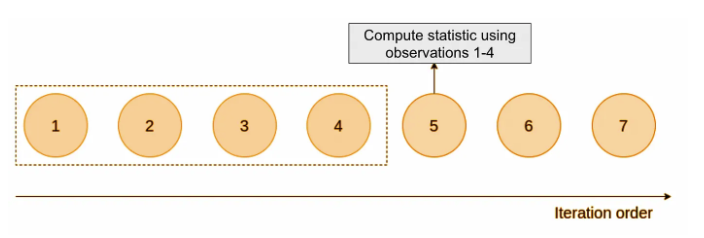

4) The initial observations lack sufficient training data to generate reliable estimates, resulting in significant variability. To address this challenge, the creators of CatBoost suggested generating multiple random permutations and creating an encoding for each permutation. The ultimate outcome is obtained by averaging these distinct encodings.




<center> <h1> References </h1> </center>

1) https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b#:~:text=How%20to%20use%20label%20encoding,%20one%20hot%20encoding,%20catboost%20encoding
2) https://www.youtube.com/watch?v=MxqQrs0dick